Found 23987 files. Starting analysis...


Analyzing Files: 100%|██████████| 23987/23987 [02:12<00:00, 181.66it/s]
/explore/nobackup/people/sjaddu/.nccstmp/ipykernel_2448763/3566938195.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bars = plt.bar(df['Class Name'], df['Pixel Count'], color=plt.cm.get_cmap('tab10').colors)



--- Dataset Class Distribution ---

        Class Name  Pixel Count  Percentage
 0: Not Determined     66331868   89.377043
         1: Cirrus      2400521    3.234516
    2: Alotstratus      1493341    2.012161
    3: Altocumulus       679509    0.915586
        4: Stratus        80508    0.108478
  5: Stratocumulus      1484680    2.000491
        6: Cumulus       797506    1.074577
   7: Nimbostratus       649072    0.874574
8: Deep Convection       298773    0.402573

Total Pixels Analyzed: 74,215,778


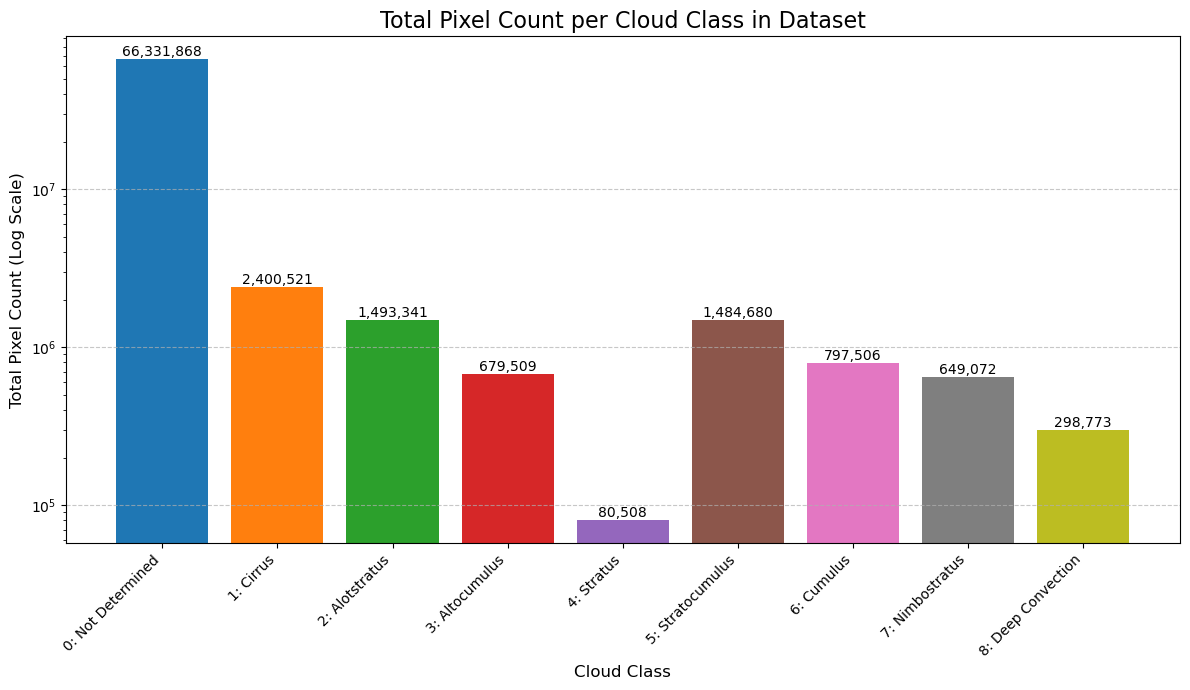

In [1]:
import numpy as np
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

def analyze_dataset_statistics(data_directory, num_classes):
    
    file_paths = glob.glob(os.path.join(data_directory, '*.npz'))

    print(f"Found {len(file_paths)} files. Starting analysis...")

    total_pixel_counts = np.zeros(num_classes, dtype=np.int64)

    for file_path in tqdm(file_paths, desc="Analyzing Files"):
        with np.load(file_path, allow_pickle=True) as data:
            mask = data['data'].item()['Cloud_mask'][:, :34]
            
            counts = np.bincount(mask.flatten(), minlength=num_classes)
            
            total_pixel_counts += counts[:num_classes]
            
    return total_pixel_counts


def plot_statistics(pixel_counts, class_names):
    
    df = pd.DataFrame({
        'Class Name': class_names,
        'Pixel Count': pixel_counts
    })
    
    total_pixels = df['Pixel Count'].sum()
    df['Percentage'] = (df['Pixel Count'] / total_pixels) * 100
    
    print("\n--- Dataset Class Distribution ---\n")
    print(df.to_string(index=False))
    print(f"\nTotal Pixels Analyzed: {total_pixels:,}")

    plt.figure(figsize=(12, 7))
    bars = plt.bar(df['Class Name'], df['Pixel Count'], color=plt.cm.get_cmap('tab10').colors)
    
    plt.title('Total Pixel Count per Cloud Class in Dataset', fontsize=16)
    plt.ylabel('Total Pixel Count (Log Scale)', fontsize=12)
    plt.xlabel('Cloud Class', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,}', va='bottom', ha='center') 

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    DATA_DIRECTORY = "/explore/nobackup/projects/pix4dcloud/szhang16/abiChips/GOES-16"
    NUM_CLASSES = 9
    CLASS_NAMES = ['0: Not Determined', '1: Cirrus', '2: Alotstratus', '3: Altocumulus', '4: Stratus', '5: Stratocumulus', '6: Cumulus', '7: Nimbostratus', '8: Deep Convection']

    final_counts = analyze_dataset_statistics(DATA_DIRECTORY, NUM_CLASSES)
    
    plot_statistics(final_counts, CLASS_NAMES)